In [1]:
import cv2
import matplotlib.pyplot as plt

In [6]:
img = cv2.imread(filename="images/cat.jpg", flags=0)
print(img.shape)
template = cv2.imread(filename="images/cat_face.jpg", flags=0)
print(template.shape)
height, width = template.shape

(433, 650)
(219, 253)


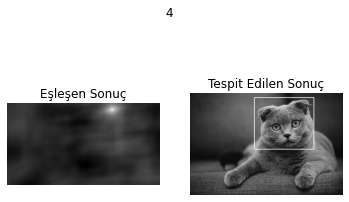

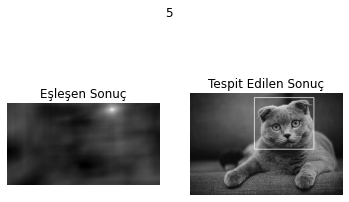

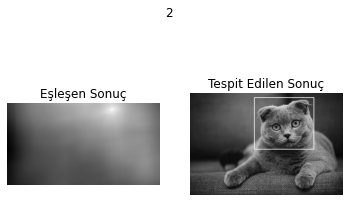

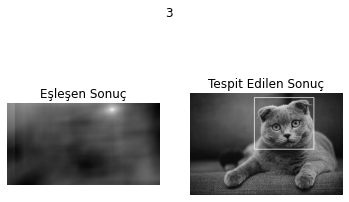

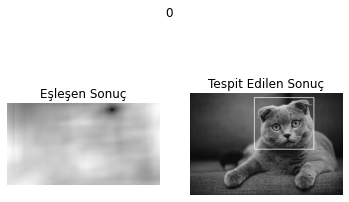

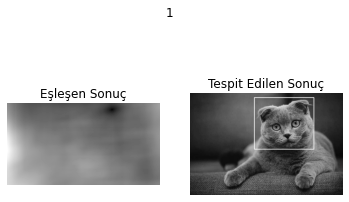

In [18]:
methods = ["cv2.TM_CCOEFF", "cv2.TM_CCOEFF_NORMED", "cv2.TM_CCORR",
           "cv2.TM_CCORR_NORMED", "cv2.TM_SQDIFF", "cv2.TM_SQDIFF_NORMED"]

for method in methods:
    method = eval(method)
    res = cv2.matchTemplate(image=img,
                            templ=template,
                            method=method)
    min_value, max_value, min_loc, max_loc = cv2.minMaxLoc(src=res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
        
    bottom_right = (top_left[0] + width, top_left[1] + height)
    
    cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=255, thickness=2)
    
    plt.figure()
    plt.subplot(121), plt.imshow(X=res, cmap="gray")
    plt.title("Eşleşen Sonuç"), plt.axis("off")
    
    plt.subplot(122), plt.imshow(X=img, cmap="gray")
    plt.title("Tespit Edilen Sonuç"), plt.axis("off")
    plt.suptitle(method)
    
    plt.show();

## cv2.matchTemplate(image, templ, method, result, mask)
### Bir şablonu belirli bir görüntü içinde aramak için kullanılan OpenCV kütüphanesindeki bir fonksiyondur. Bu fonksiyon, şablonun benzerlik haritasını oluşturur ve görüntüdeki potansiyel eşleşmeleri bulmak için kullanılır.
### image: Şablonun aranacağı görüntüdür. Bu, 8-bit veya 32-bit float bir tek kanallı görüntü olabilir.
### templ: Aranan şablondur. Bu, "image" ile aynı özelliklere sahip bir görüntü olmalıdır.
### method: Eşleşme yöntemini belirten bir parametredir. Bu parametre, şablonun benzerlik haritasını oluşturmak için kullanılan farklı yöntemler arasında seçim yapmanızı sağlar.
#### cv2.TM_SQDIFF: Kareler farkı yöntemi
#### cv2.TM_SQDIFF_NORMED: Normalleştirilmiş kareler farkı yöntemi.
#### cv2.TM_CORR: Korelasyon yöntemi
#### cv2.TM_CORR_NORMED: Normalleştirilmiş korelasyon yöntemi.
#### cv2.TM_COEFF: Katsayı korelasyonu yöntemi
#### cv2.TM_CCOEFF_NORMED: Normalleştirilmiş katsayı korelasyonu yöntemi.

### result: Şablonun benzerlik haritasının çıktısıdır. Bu, "image" ve "template" arasındaki eşleşmeyi temsil eden bir 2D Numpy dizisidir.

## cv2.minMaxLoc(src, mask, minVal, maxVal, minLoc, maxLoc)
### Bu fonksiyon, bir görüntüdeki en küçük ve en büyük değerleri ve bu değerlere ait konumları bulmak için kullanılan bir fonksiyondur. Bu fonksiyon, görüntü üzerinde minimum ve maksimum değerleri bulmak için kullanışlıdır.
### src: Minimum ve maksimum değerleri bulunacak olan giriş görüntüsüdür.
### mask: İsteğe bağlı bir parametredir ve maskelemek için kullanılır. Eğer belirtilirse, yalnızca maskenin 1 olduğu pikseller hesaba katılır. Varsayılan değeri None'dur.
### minVal: Minimum değeri temsil eden çıktı değişkenidir.
### maxVal: Maksimum değeri temsil eden çıktı değişkenidir.
### minLoc: Minimum değere ait konumu temsil eden çıktı değişkenidir.
### maxLoc: Maksimum değere ait konumu temsil eden çıktı değişkenidir.

In [19]:
?cv2.matchTemplate

Docstring:
matchTemplate(image, templ, method[, result[, mask]]) -> result
.   @brief Compares a template against overlapped image regions.
.   
.   The function slides through image , compares the overlapped patches of size \f$w \times h\f$ against
.   templ using the specified method and stores the comparison results in result . #TemplateMatchModes
.   describes the formulae for the available comparison methods ( \f$I\f$ denotes image, \f$T\f$
.   template, \f$R\f$ result, \f$M\f$ the optional mask ). The summation is done over template and/or
.   the image patch: \f$x' = 0...w-1, y' = 0...h-1\f$
.   
.   After the function finishes the comparison, the best matches can be found as global minimums (when
.   #TM_SQDIFF was used) or maximums (when #TM_CCORR or #TM_CCOEFF was used) using the
.   #minMaxLoc function. In case of a color image, template summation in the numerator and each sum in
.   the denominator is done over all of the channels and separate mean values are used for each 